## Observations and Insights 

In [145]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
# %matplotlib widget

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()
study_results.head()
# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer' )
# Display the data table for preview
df.head()
# df.shape

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [146]:
# Checking the number of mice.
df['Mouse ID'].nunique()

249

In [147]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouseid = df.loc[df.duplicated(['Mouse ID','Timepoint'])]['Mouse ID'].unique()
duplicate_mouseid=duplicate_mouseid[0]
duplicate_mouseid

'g989'

In [148]:
df['Mouse ID']==duplicate_mouseid

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Name: Mouse ID, Length: 1893, dtype: bool

In [149]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouseid_data =  df.loc[df['Mouse ID']==duplicate_mouseid]

duplicate_mouseid_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [150]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df[df['Mouse ID'] != duplicate_mouseid]

clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [151]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())


248

## Summary Statistics

In [152]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mice_df = clean_df.groupby(['Drug Regimen'])

tumor_vol_mean = mice_df['Tumor Volume (mm3)'].mean()
tumor_vol_median = mice_df['Tumor Volume (mm3)'].median()
tumor_vol_std = mice_df['Tumor Volume (mm3)'].std()
tumor_vol_var = mice_df['Tumor Volume (mm3)'].var()
tumor_vol_sem = mice_df['Tumor Volume (mm3)'].sem()

summary_regimen = {    'Tumor Vol Mean': tumor_vol_mean, 
                     'Tumor Vol Median': tumor_vol_median, 
                     'Tumor Vol StD': tumor_vol_std,
                     'Tumor Vol Var': tumor_vol_var,
                     'Tumor Vol SEM': tumor_vol_sem
                    }

summary_regimen_df = pd.DataFrame(summary_regimen)
summary_regimen_df

,Tumor Vol Mean,Tumor Vol Median,Tumor Vol StD,Tumor Vol Var,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [153]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mice_df['Tumor Volume (mm3)'].describe()

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

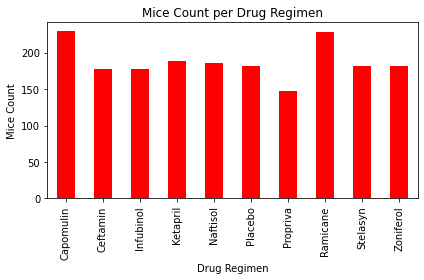

In [154]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

mcount_df = pd.DataFrame(clean_df.groupby(['Drug Regimen'])['Mouse ID'].count())
mcount_df.rename(columns = {'Mouse ID': 'Mice Count'}, inplace=True)
mcount_df

mcount_df.plot(kind='bar', color='r', legend=False)
plt.ylabel('Mice Count')
plt.title('Mice Count per Drug Regimen')
plt.tight_layout()


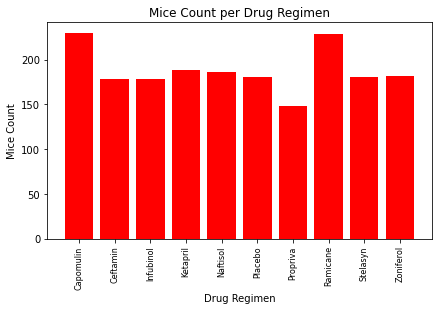

In [155]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

x_axis = np.arange(len(mcount_df.index))
labels = list(mcount_df.index)

plt.bar(x_axis, mcount_df['Mice Count'], color='r')
plt.xticks(x_axis, labels, rotation=90, fontsize=8)
plt.tight_layout()
plt.xlabel('Drug Regimen')
plt.ylabel('Mice Count')
plt.title('Mice Count per Drug Regimen')
plt.show()


In [156]:
clean_df['Sex'].value_counts()

Male      958
Female    922
Name: Sex, dtype: int64

In [157]:
gcount_df = clean_df['Sex'].value_counts()

gcount_df

Male      958
Female    922
Name: Sex, dtype: int64

Text(0.5, -0.1, 'Mice Count By Sex')

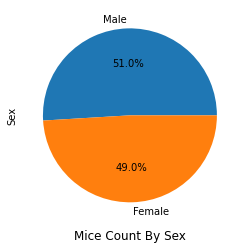

In [158]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gcount_df
gcount_df.plot.pie(legend=False, autopct="%1.1f%%")
plt.title('Mice Count By Sex', y=-0.1)

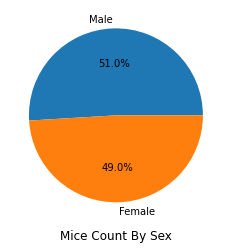

In [159]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gcount_df, labels=list(gcount_df.index), autopct="%1.1f%%")

plt.title('Mice Count By Sex', loc='center', y=-0.1)

plt.show()

## Quartiles, Outliers and Boxplots

In [160]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_tp_df = clean_df.groupby(['Mouse ID'])['Timepoint'].max()
max_tp_df = max_tp_df.reset_index()
max_tp_df


,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [161]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = max_tp_df.merge(clean_df, on=['Mouse ID', 'Timepoint'], how='left')
merged_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [162]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

treatments_df = merged_df.loc[new_df['Drug Regimen'].isin(treatments)]

treatments_df = treatments_df[['Drug Regimen','Tumor Volume (mm3)']]

treatments_df

,Drug Regimen,Tumor Volume (mm3)
0,Infubinol,67.973419
1,Infubinol,65.525743
3,Ceftamin,62.999356
6,Ramicane,38.407618
7,Ramicane,43.047543
...,...,...
238,Ceftamin,68.594745
239,Capomulin,31.896238
240,Ceftamin,64.729837
244,Ramicane,30.638696


In [163]:
# Create empty list to fill with tumor vol data (for plotting)
list_tumorvol = []

for drug in treatments:
    final_treatments_df=treatments_df.loc[treatments_df['Drug Regimen']==drug]['Tumor Volume (mm3)']
    list_tumorvol.append(final_treatments_df)
    
# list_tumorvol



In [164]:
list_tumorvol_dict = {k:v for k,v in zip(treatments, list_tumorvol) }
list_tumorvol_dict

{'Capomulin': 19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 80     47.685963
 83     37.311846
 85     38.125164
 87     38.753265
 108    41.483008
 115    38.846876
 121    28.430964
 124    33.329098
 162    46.539206
 163    32.377357
 169    41.581521
 174    23.343598
 180    40.728578
 183    34.455298
 192    31.023923
 204    40.658124
 208    39.952347
 220    36.041047
 226    28.484033
 239    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 'Ramicane': 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 76     33.562402
 77     36.374510
 91     31.560470
 93     36.134852
 96     22.050126
 119    30.564625
 126    31.095335
 157    45.220869
 158    36.561652
 166    37.225650
 168    43.419381
 177    30.276232
 190    40.667713
 217    43.166373
 235    44.183451
 244    30.638696
 Name: Tumor Volume (mm3), dtype

In [165]:
# list_tumorvol_dict['Capomulin'][list_tumorvol_dict['Capomulin']>32.37735684]

In [192]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes 
    # add subset 
    # Determine outliers using upper and lower bounds
outliers_drug = {}
for drug in list_tumorvol_dict:
    quartiles = list_tumorvol_dict[drug].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr) 
    outliers_list = list_tumorvol_dict[drug][(list_tumorvol_dict[drug]>upper_bound) | (list_tumorvol_dict[drug]<lower_bound)]
    outliers_drug[drug] = outliers_list
    
    

In [193]:
# finding the the 
outliers_drug 

{'Capomulin': Series([], Name: Tumor Volume (mm3), dtype: float64),
 'Ramicane': Series([], Name: Tumor Volume (mm3), dtype: float64),
 'Infubinol': 31    36.321346
 Name: Tumor Volume (mm3), dtype: float64,
 'Ceftamin': Series([], Name: Tumor Volume (mm3), dtype: float64)}

In [194]:
#finding the outlier mouse by the Mouse ID.
outlier_mouse = merged_df[merged_df.index==31]
outlier_mouse

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
31,c326,5,Infubinol,Female,18,25,36.321346,0


{'whiskers': [<matplotlib.lines.Line2D at 0x1b3bdfa9460>,
 'caps': [<matplotlib.lines.Line2D at 0x1b3bdfa9b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b3bdfa9220>,
 'medians': [<matplotlib.lines.Line2D at 0x1b3bdfb4160>,
 'fliers': [<matplotlib.lines.Line2D at 0x1b3bdfb44c0>,
 'means': []}

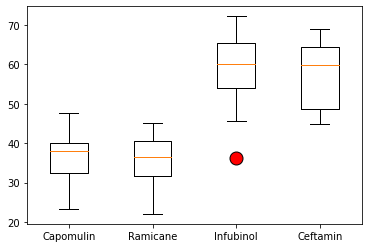

In [195]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

outliers_red = dict(markerfacecolor='red' , markersize=13)

# plt.boxplot(list_tumorvol, labels=treatments, flierprops=outliers_red)
plt.boxplot(list_tumorvol_dict.values(), labels=list_tumorvol_dict.keys(), flierprops=outliers_red)

## Line and Scatter Plots

In [222]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
import random 
capomulin_mice = clean_df.loc[clean_df['Drug Regimen']=='Capomulin']['Mouse ID']
capomulin_mice
random_cap_mouse = random.choice(capomulin_mice)
random_cap_mouse

'x401'

In [237]:
capomulin_df = clean_df.loc[clean_df['Drug Regimen']=='Capomulin']
capomulin_df
cap_mouse = clean_df.loc[clean_df['Mouse ID']==random_cap_mouse]
cap_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
20,x401,Capomulin,Female,16,15,0,45.000000,0
21,x401,Capomulin,Female,16,15,5,45.473753,0
22,x401,Capomulin,Female,16,15,10,39.113891,0
23,x401,Capomulin,Female,16,15,15,39.776250,0
24,x401,Capomulin,Female,16,15,20,36.065835,0
25,x401,Capomulin,Female,16,15,25,36.617120,0
26,x401,Capomulin,Female,16,15,30,32.915292,0
27,x401,Capomulin,Female,16,15,35,30.206825,0
28,x401,Capomulin,Female,16,15,40,28.167397,0
29,x401,Capomulin,Female,16,15,45,28.484033,0


Text(0.5, 1.0, 'Capomulin drug timepoint Vs Tumor Volume')

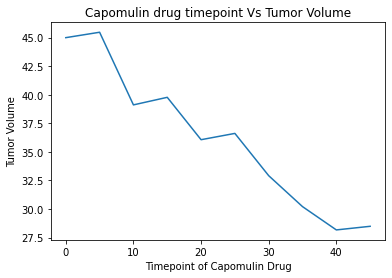

In [238]:
plt.plot(cap_mouse['Timepoint'], cap_mouse['Tumor Volume (mm3)'] )
plt.xlabel('Timepoint of Capomulin Drug')
plt.ylabel('Tumor Volume')
plt.title('Capomulin drug timepoint Vs Tumor Volume')

In [239]:
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [243]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_mice_wt = capomulin_df.groupby(['Mouse ID'])['Weight (g)'].unique()
capomulin_mice_wt

Mouse ID
b128    [22]
b742    [21]
f966    [17]
g288    [19]
g316    [22]
i557    [24]
i738    [20]
j119    [23]
j246    [21]
l509    [21]
l897    [19]
m601    [17]
m957    [19]
r157    [25]
r554    [17]
r944    [25]
s185    [17]
s710    [23]
t565    [17]
u364    [17]
v923    [21]
w150    [23]
w914    [21]
x401    [15]
y793    [17]
Name: Weight (g), dtype: object

In [248]:
avg_tumor_per_mouse = capomulin_df.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
avg_tumor_per_mouse

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64

Text(0.5, 1.0, 'Mice weight Vs Avg Tumor Volume for Capomulin Drug')

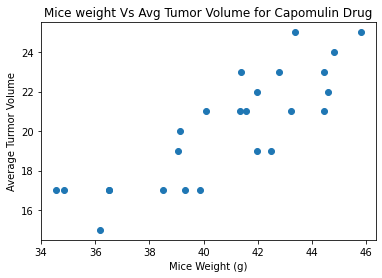

In [250]:
plt.scatter(avg_tumor_per_mouse, capomulin_mice_wt )
plt.xlabel('Mice Weight (g)')
plt.ylabel('Average Turmor Volume')
plt.title('Mice weight Vs Avg Tumor Volume for Capomulin Drug')

## Correlation and Regression

In [172]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
